In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:

# Load the data
county_clare = pd.read_csv("data/dly518_clare-shannonairport.csv")
county_clare["date"] = pd.to_datetime(county_clare["date"])
county_clare = county_clare[(county_clare["date"].dt.year >= 2013) & (county_clare["date"].dt.year <= 2023)]


C:\Users\meatefza\AppData\Local\Temp\ipykernel_13136\2749430795.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  county_clare["date"] = pd.to_datetime(county_clare["date"])


In [3]:
county_clare = county_clare.loc[:, ~county_clare.columns.str.startswith(('ind', 'file','igmin'))]

In [4]:
import pandas as pd
import numpy as np
import re

# Function to replace NaN values and occurrences of r'\s+' with mean value of the column for the month and year of the date related to that row
def replace_nan_and_whitespace_with_mean(df):
    for column in df.columns:
        if column != 'date':
            # Replace occurrences of r'\s+' with NaN
            df[column] = df[column].apply(lambda x: x if not (isinstance(x, str) and re.search(r'\s+', x)) else np.nan)
            # Ensure all values are numeric
            df[column] = pd.to_numeric(df[column], errors='coerce')
            # Replace NaN values with mean value of the column for the month and year of the date related to that row, approximated to the first decimal number
            df[column] = df.apply(lambda row: row[column] if not pd.isna(row[column]) else round(df[(df['date'].dt.year == row['date'].year) & (df['date'].dt.month == row['date'].month)][column].mean(), 1), axis=1)
            # Round all float numbers to the first decimal point
            df[column] = df[column].round(1)
    return df

# Replace NaN values and occurrences of r'\s+' with mean values
county_carlowoakpark = replace_nan_and_whitespace_with_mean(county_clare)

#filtered_df = county_clarenew.query("date == '2013-07-10' or date == '2013-05-14' or date == '2013-07-11'")

#print(filtered_df)


In [5]:
county_clare = county_clare.loc[:, ~county_clare.columns.str.startswith(('ind', 'file','igmin'))]

In [7]:
county_clare.head()

date  maxtp  mintp  gmin  rain     cbl  wdsp  hm  ddhm  hg  sun  \
24594 2013-01-01    8.3    2.9   0.3   2.1  1009.0   8.3  24   290  35  3.2   
24595 2013-01-02   11.8    7.3   0.8   1.5  1020.9   9.5  16   240  21  0.0   
24596 2013-01-03   13.1    9.5   6.5   0.7  1028.5   6.2  11   220  15  2.4   
24597 2013-01-04   11.5    7.6   2.9   0.0  1029.6  10.6  19   160  24  0.1   
24598 2013-01-05   12.3    8.1   5.8   1.6  1026.1   9.9  20   170  26  0.1   

       dos  soil   pe  evap  smd_wd  smd_md  smd_pd  
24594    0   5.2  0.2   0.2     0.0    -1.9   -10.0  
24595    0   7.6  0.3   0.4     0.0    -1.2   -10.0  
24596    0   8.8  0.1   0.2     0.0    -0.6   -10.0  
24597    0   8.4  0.6   0.7     0.6     0.6    -8.9  
24598    0   8.3  0.4   0.5     0.0    -0.6    -9.7

In [8]:
county_clare[["sun","hm","ddhm"]] = county_clare[["sun","hm","ddhm"]].astype("int64")
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_clare[columns_to_convert] = county_clare[columns_to_convert].astype(float)


In [ ]:
print(county_clare.dtypes)

date      datetime64[ns]
maxtp            float64
mintp            float64
gmin             float64
rain             float64
cbl              float64
wdsp             float64
hm                 int64
ddhm               int64
hg                 int64
soil             float64
pe               float64
evap             float64
smd_wd           float64
smd_md           float64
smd_pd           float64
glorad             int64
dtype: object


In [11]:
county_clare.to_parquet('county_clare.parquet')

In [9]:
county_clare = county_clare.loc[:, ~county_clare.columns.str.startswith(('dos'))]

In [10]:
county_clare.head()

date  maxtp  mintp  gmin  rain     cbl  wdsp  hm  ddhm  hg  sun  \
24594 2013-01-01    8.3    2.9   0.3   2.1  1009.0   8.3  24   290  35    3   
24595 2013-01-02   11.8    7.3   0.8   1.5  1020.9   9.5  16   240  21    0   
24596 2013-01-03   13.1    9.5   6.5   0.7  1028.5   6.2  11   220  15    2   
24597 2013-01-04   11.5    7.6   2.9   0.0  1029.6  10.6  19   160  24    0   
24598 2013-01-05   12.3    8.1   5.8   1.6  1026.1   9.9  20   170  26    0   

       soil   pe  evap  smd_wd  smd_md  smd_pd  
24594   5.2  0.2   0.2     0.0    -1.9   -10.0  
24595   7.6  0.3   0.4     0.0    -1.2   -10.0  
24596   8.8  0.1   0.2     0.0    -0.6   -10.0  
24597   8.4  0.6   0.7     0.6     0.6    -8.9  
24598   8.3  0.4   0.5     0.0    -0.6    -9.7

Rainfall Amount Prediction Using LSTM


Training and evaluating model with 7 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


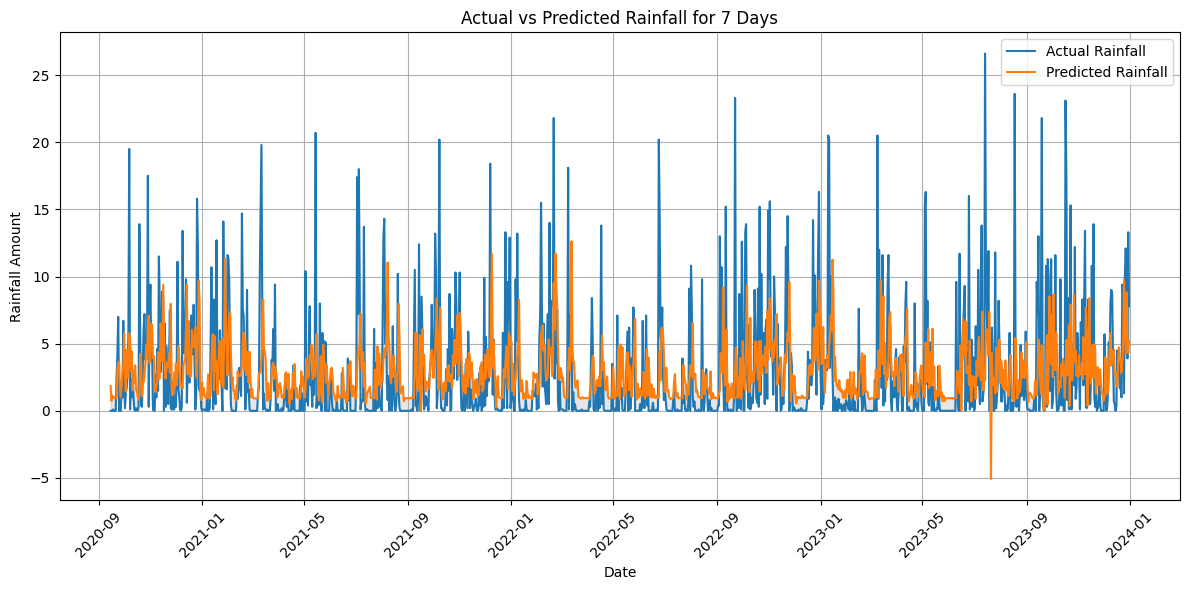


Training and evaluating model with 14 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


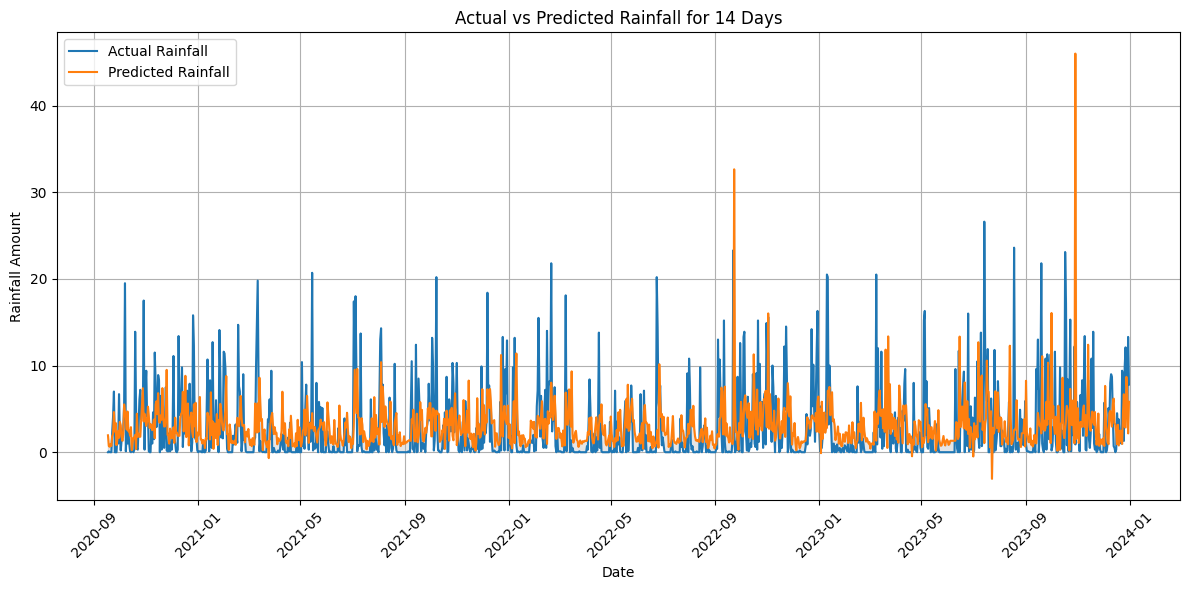


Training and evaluating model with 21 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


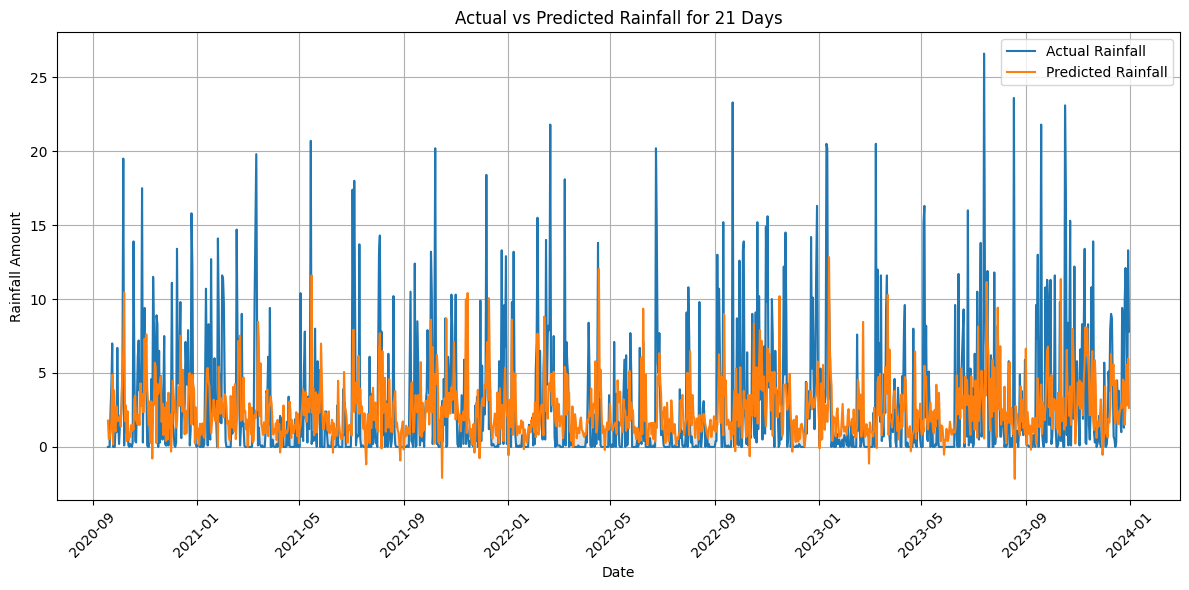


Training and evaluating model with 28 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


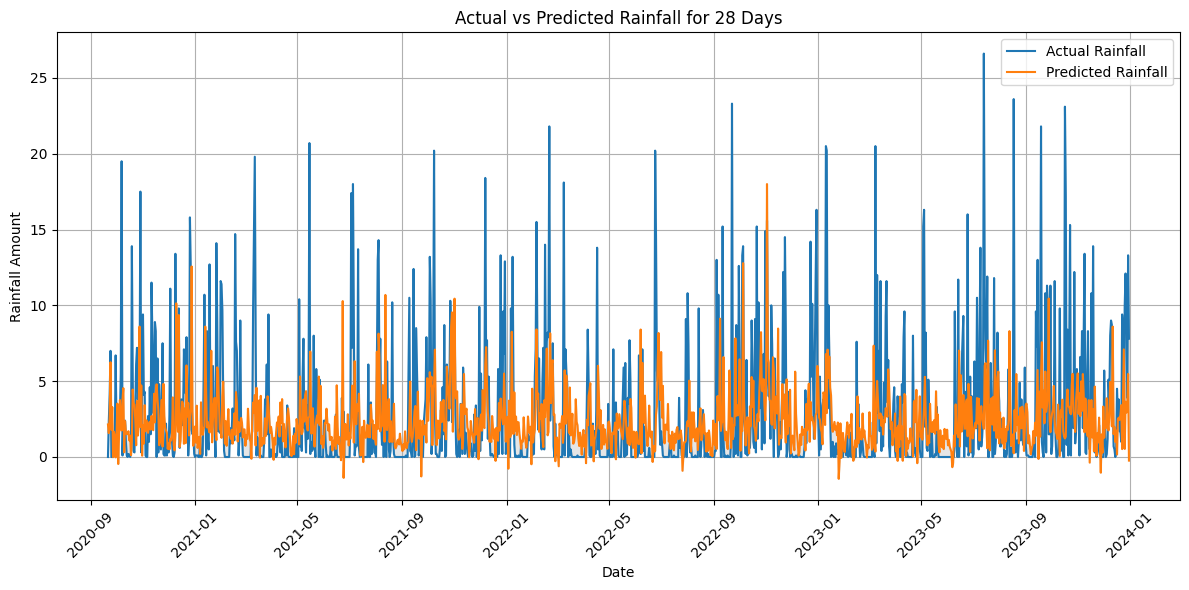

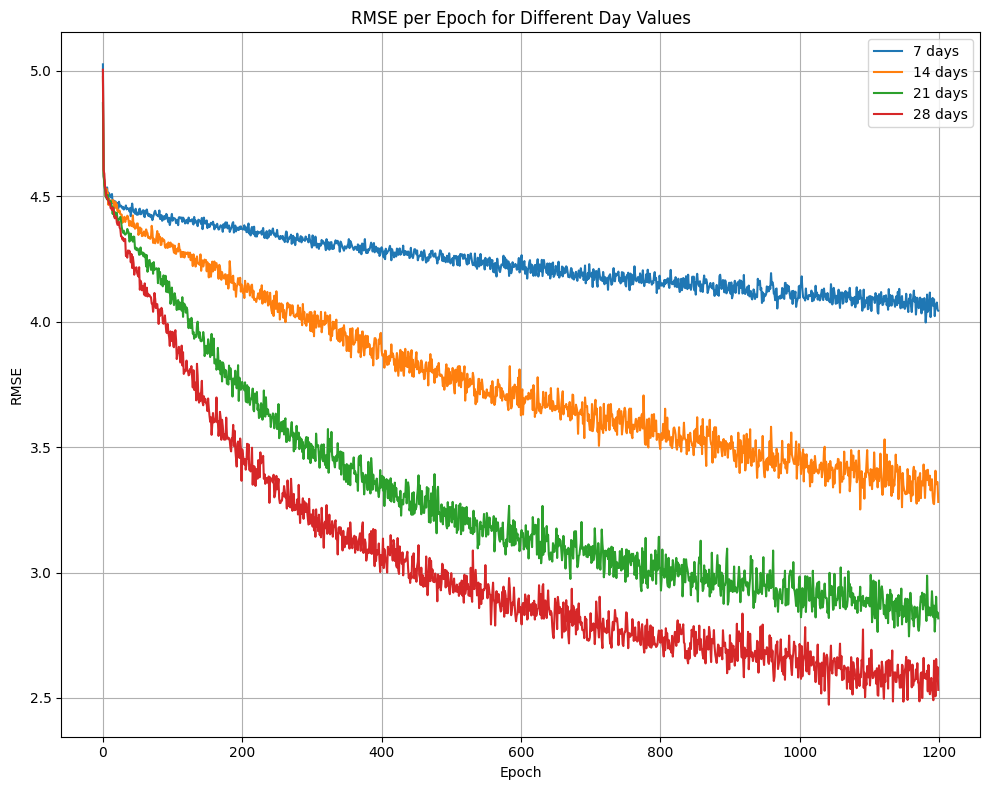

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 4: Train the Model
    history = model.fit(X_train, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 5: Evaluate the Model
    y_pred = model.predict(X_test)
    mse_loss = MeanSquaredError()
    mse = mse_loss(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days')

    plt.title('RMSE per Epoch for Different Day Values')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming your DataFrame 'county_clare' is already loaded and has 'date' and 'rain' columns
# Make sure 'date' column is in datetime format if it's not already
# If not in datetime format, you might need to add a line like:
# county_clare['date'] = pd.to_datetime(county_clare['date'])

# Test the function with different numbers of days
for days in [7, 14,21,28]: # Reduced the number of days for brevity in the example
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days, county_clare.copy()) # Pass a copy

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)

Applying Kernel PCA with LSTM


Training and evaluating model with 7 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


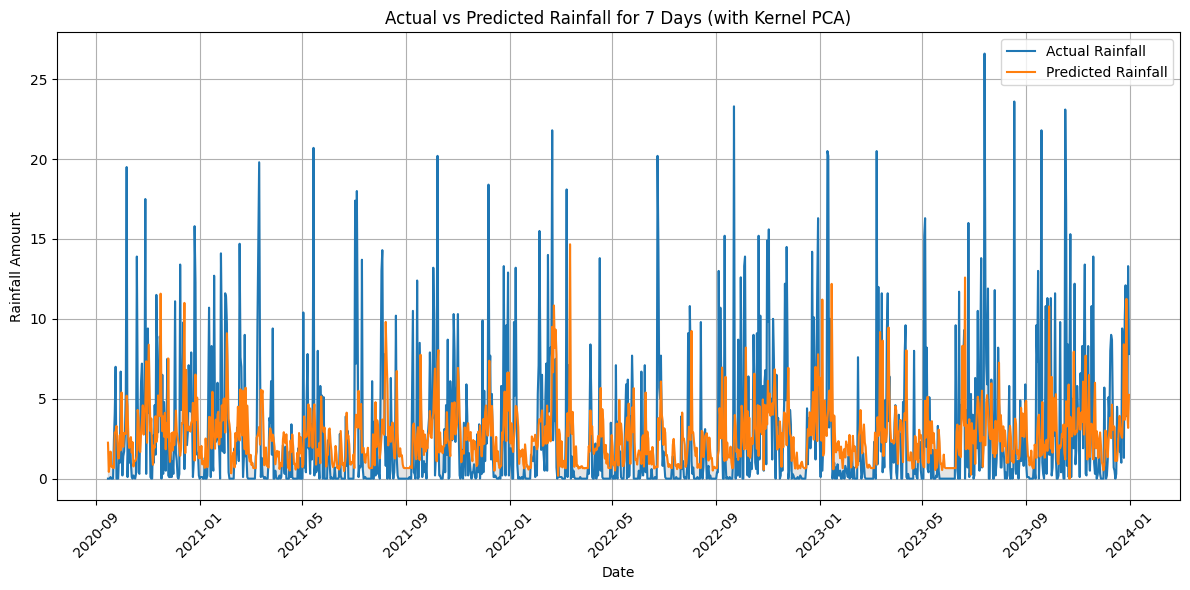


Training and evaluating model with 14 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


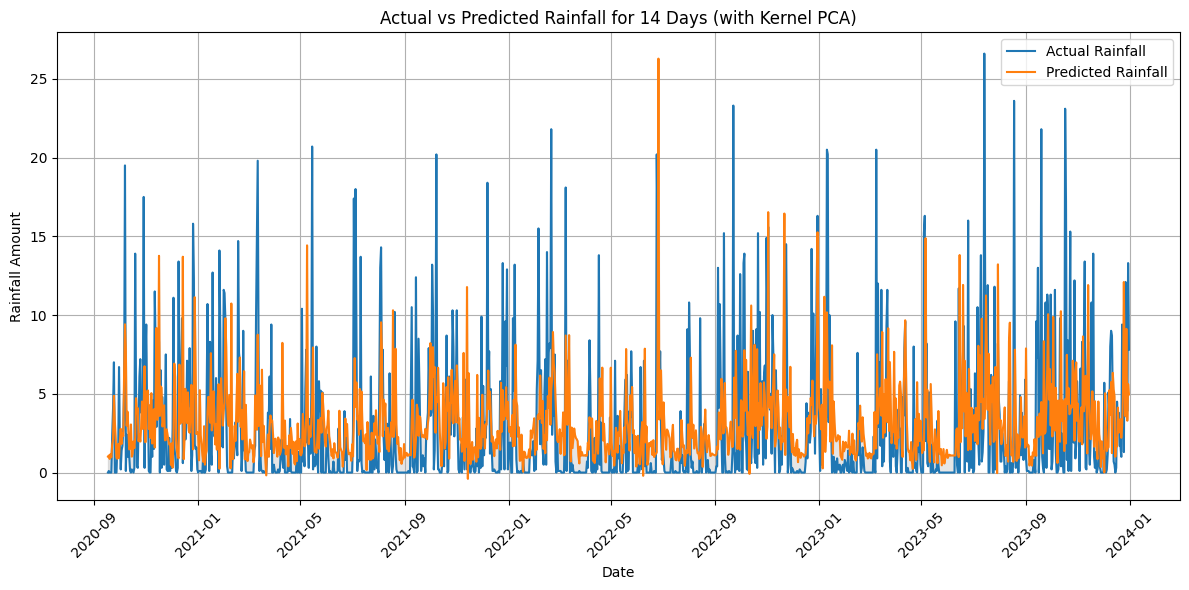


Training and evaluating model with 21 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


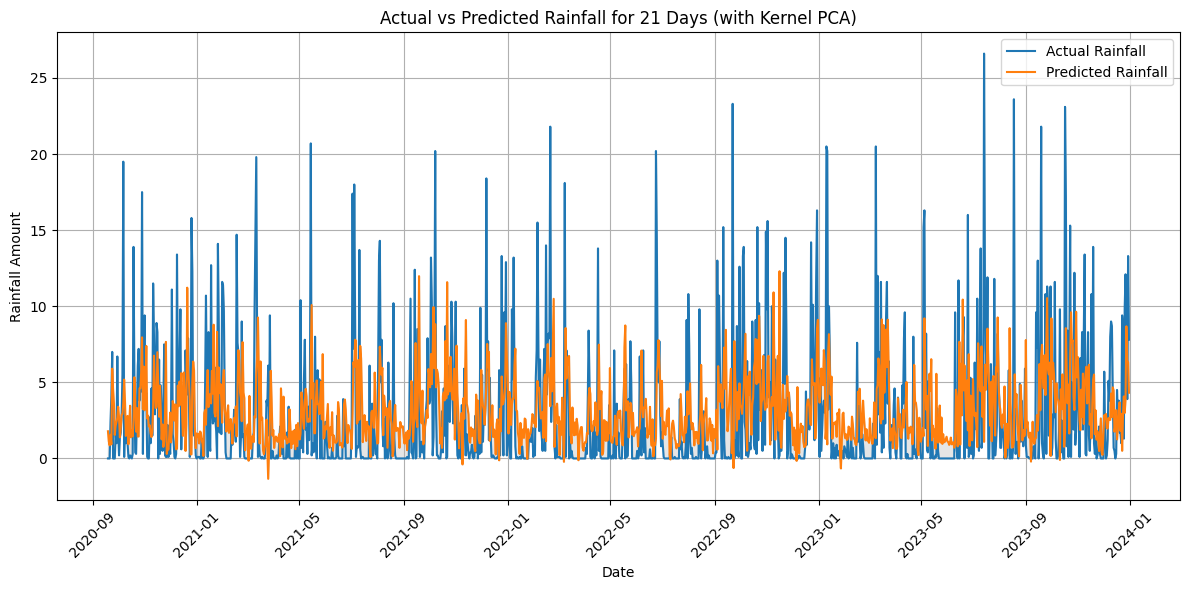


Training and evaluating model with 28 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


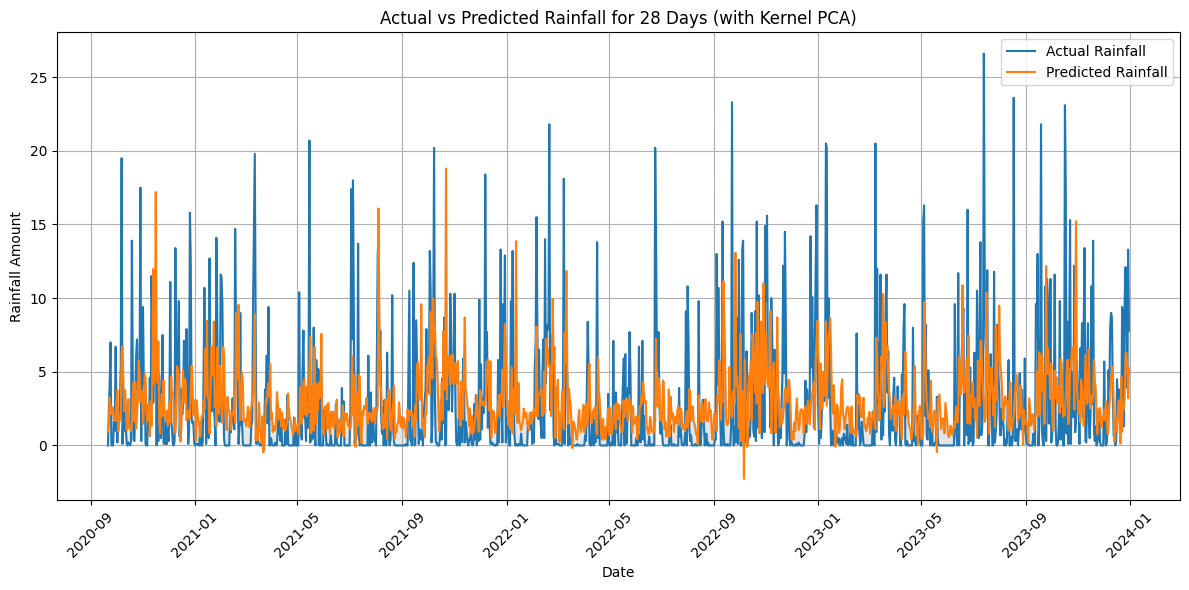

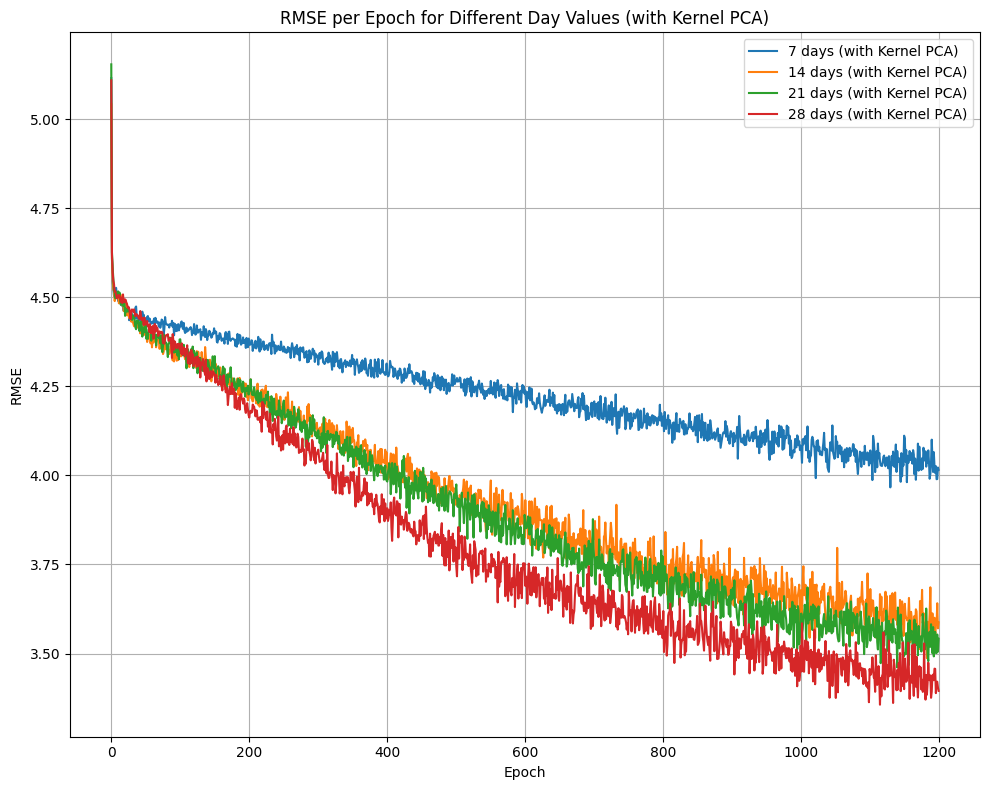

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Apply Kernel PCA
    n_components = min(X_train.shape[1], 15) # Choose a reasonable number of components
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1) # You can experiment with different kernels and gamma
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Step 4: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_kpca.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 5: Train the Model
    history = model.fit(X_train_kpca, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test_kpca)
    mse_loss = MeanSquaredError()
    mse = mse_loss(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days (with Kernel PCA)')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days (with Kernel PCA)')

    plt.title('RMSE per Epoch for Different Day Values (with Kernel PCA)')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Test the function with different numbers of days
for days in [7, 14,21,28]: # Reduced the number of days for brevity in the example
    print(f"\nTraining and evaluating model with {days} days of previous rain data (with Kernel PCA):")
    train_and_evaluate_model(days, county_clare.copy()) # Pass a copy

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)

Using MAE to measure model performance


Training and evaluating model with 7 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


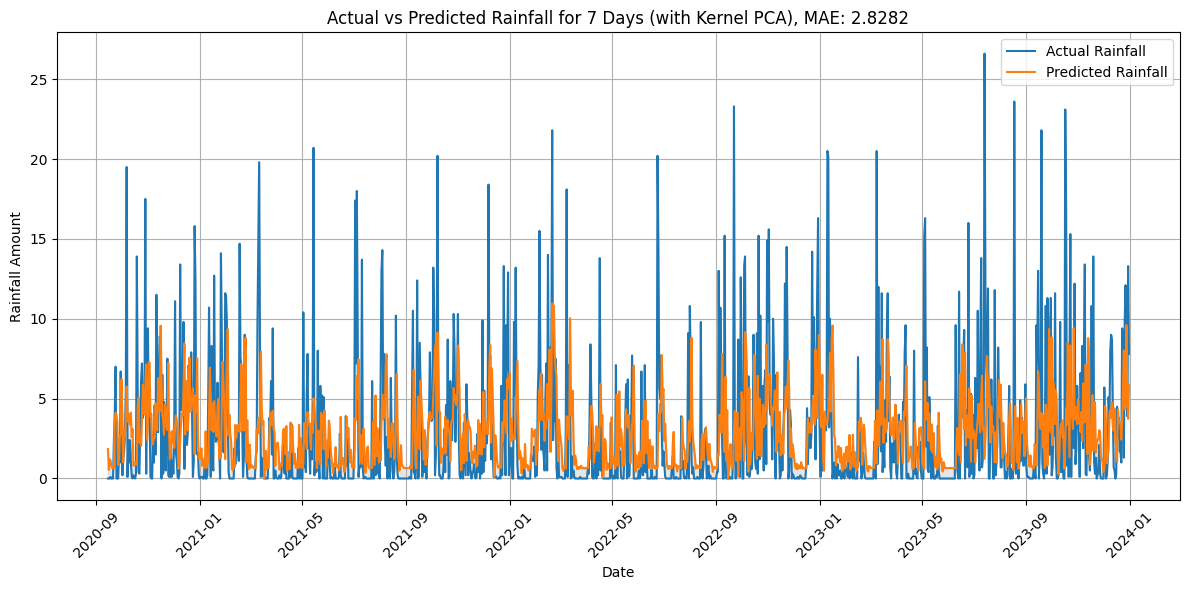


Training and evaluating model with 14 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


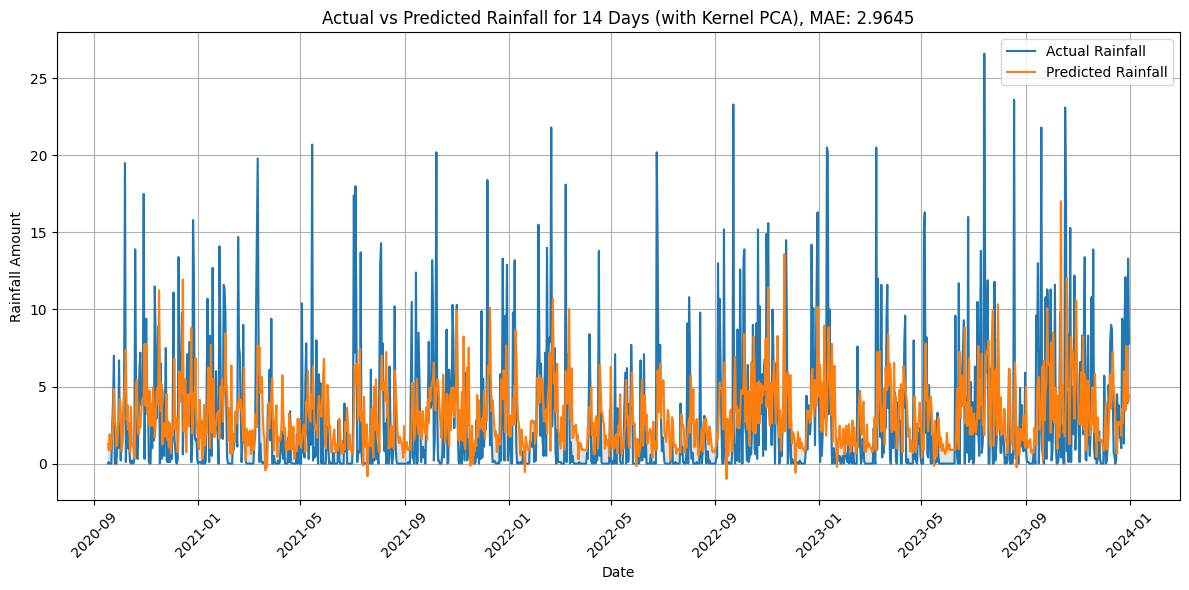


Training and evaluating model with 21 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


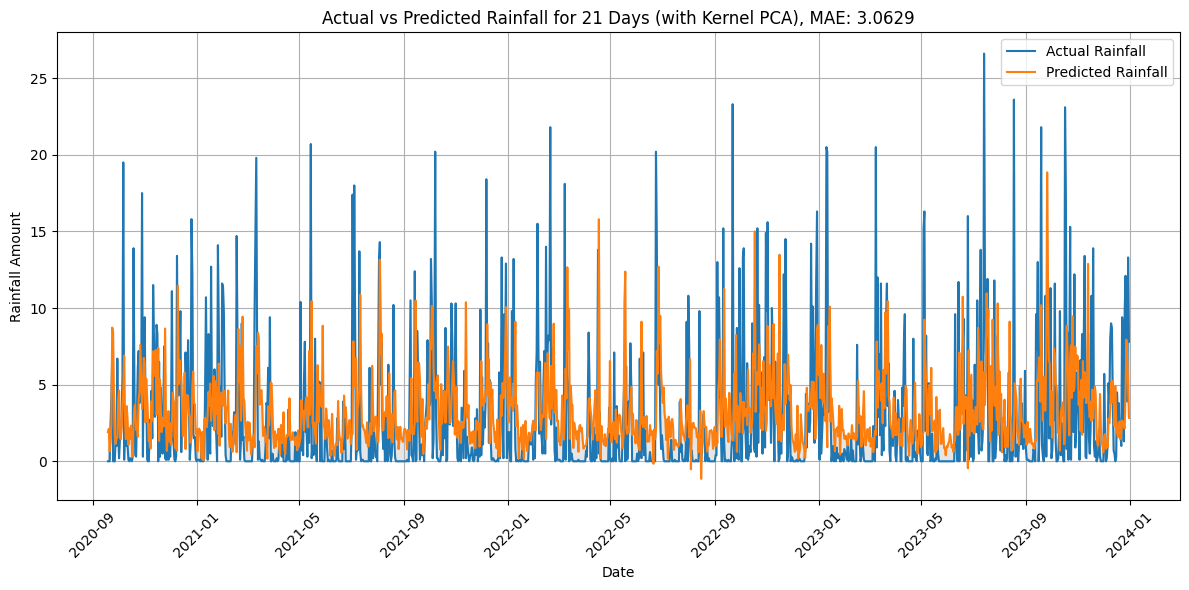


Training and evaluating model with 28 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


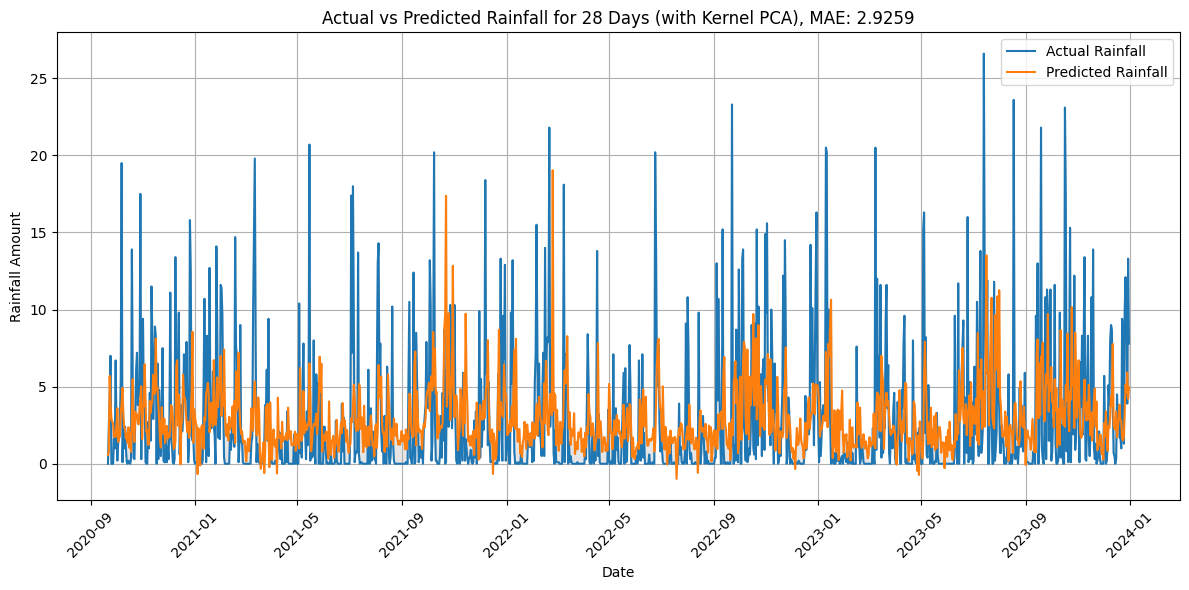

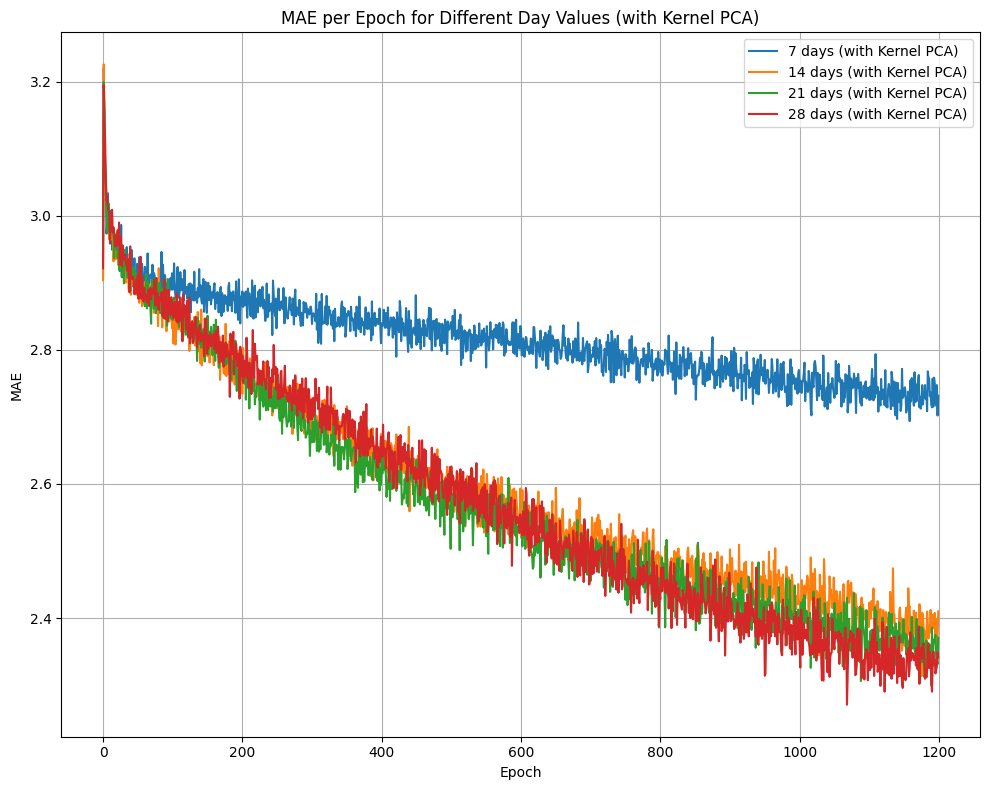

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store MAE values for each 'days' value
mae_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Apply Kernel PCA
    n_components = min(X_train.shape[1], 15) # Choose a reasonable number of components
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1) # You can experiment with different kernels and gamma
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Step 4: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_kpca.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) # Keep MSE for training, add MAE for evaluation

    # Step 5: Train the Model
    history = model.fit(X_train_kpca, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test_kpca)
    mae_loss = MeanAbsoluteError()
    mae = mae_loss(y_test, y_pred)

    # Store MAE values for each epoch in the dictionary
    mae_per_epoch_per_days[days] = history.history['mae'] # Store MAE from history

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days (with Kernel PCA), MAE: {mae:.4f}') # Include MAE in title
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all MAE values
def plot_mae(mae_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, mae_values in mae_per_epoch_per_days.items():
        plt.plot(mae_values, label=f'{days} days (with Kernel PCA)')

    plt.title('MAE per Epoch for Different Day Values (with Kernel PCA)')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
for days in [7, 14, 21, 28]: 
    print(f"\nTraining and evaluating model with {days} days of previous rain data (with Kernel PCA):")
    train_and_evaluate_model(days, county_clare.copy()) # Pass a copy

# After all models are trained, plot the MAE values
plot_mae(mae_per_epoch_per_days)



Training and evaluating model with n_components = 5:
Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30.7513 - mae: 3.0228
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1484 - mae: 3.2353
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.1608 - mae: 3.1809
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.1431 - mae: 3.0633
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.4324 - mae: 3.2386
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.9813 - mae: 2.9565
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.9847 - mae: 3.0234
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.6265 - mae: 2.9850
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.2774 - mae: 2.9773
Epoch 10/1200
38/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.5048 - mae: 3.2105 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8390 - mae: 3.1012
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.7982 - mae: 3.0980
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0463 - mae: 2.9897
Epoch 13/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2759 - mae: 2.9329
Epoch 14/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.0436 - mae: 2.9117
Epoch 15/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9944 - mae: 3.1957
Epoch 16/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.8233 - mae: 2.9433
Epoch 17/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7041 - mae: 3.0746
Epoch 18/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3151 - mae: 2.8619
Epoch 19/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.8378 - mae: 2.8169
Epoch 20/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.6293 - mae: 2.9437
Epoch 21/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6365 - mae: 3.1842
Epoch 22/1200
88/8

c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 28.6134 - mae: 2.9339
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.4708 - mae: 3.2693  
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.3907 - mae: 3.0760  
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.6416 - mae: 3.1049
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.3588 - mae: 3.0306
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.6166 - mae: 2.9740
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.8957 - mae: 2.8303
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.4108 - mae: 3.1069
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.4658 - mae: 2.8505
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7980 - mae: 2.9388
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.2134 - mae: 3.0472
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.5080 - mae: 2.9342
Epoch 13/1200
88/88 ━━

c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32.5005 - mae: 3.0822
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.5937 - mae: 3.1513
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.3204 - mae: 3.1554
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8057 - mae: 3.0239
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.7102 - mae: 3.1160
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.4788 - mae: 2.9880
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2818 - mae: 3.0032
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.6712 - mae: 2.9901
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.6240 - mae: 2.9412
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5851 - mae: 2.8425
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.8248 - mae: 2.8769
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.7720 - mae: 3.0272
Epoch 13/1200
88/88 ━━━━━━

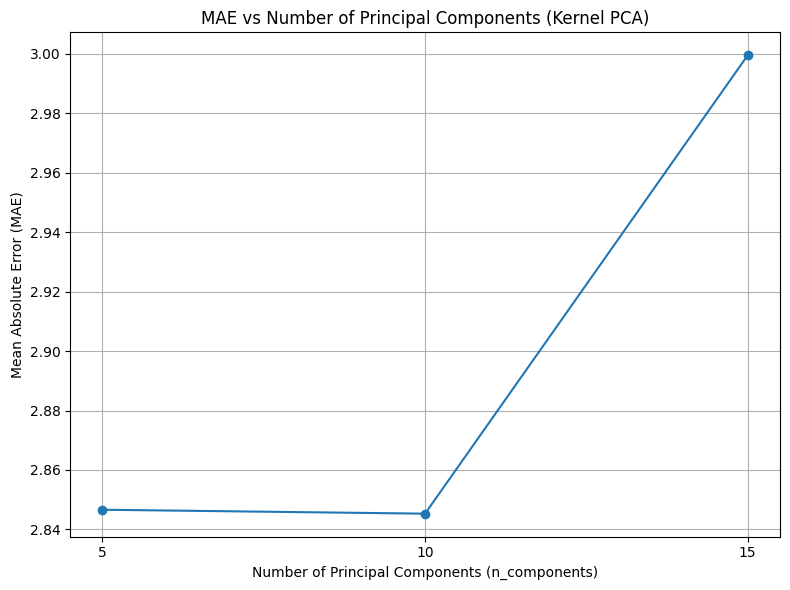

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


# Initialize a dictionary to store MAE values for each n_components
mae_per_n_components = {}

def train_and_evaluate_model(n_components, original_df, days=7):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 3: Apply Kernel PCA
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1) # You can experiment with different kernels and gamma
    X_train_kpca = kpca.fit_transform(X_train_scaled)
    X_test_kpca = kpca.transform(X_test_scaled)

    # Step 4: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_kpca.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) # Keep MSE for training, add MAE for evaluation

    # Step 5: Train the Model
    model.fit(X_train_kpca, y_train, epochs=1200, batch_size=32, verbose=1)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test_kpca)
    mae_loss = MeanAbsoluteError()
    mae = mae_loss(y_test, y_pred).numpy() # Get the scalar value

    return mae

# Iterate through different values of n_components
n_components_values = [5, 10, 15]
mae_values = []

for n_comp in n_components_values:
    print(f"\nTraining and evaluating model with n_components = {n_comp}:")
    mae = train_and_evaluate_model(n_comp, county_clare.copy())
    print(f"MAE for n_components = {n_comp}: {mae:.4f}")
    mae_values.append(mae)
    mae_per_n_components[n_comp] = mae

# Plotting the MAE against n_components
plt.figure(figsize=(8, 6))
plt.plot(n_components_values, mae_values, marker='o')
plt.title('MAE vs Number of Principal Components (Kernel PCA)')
plt.xlabel('Number of Principal Components (n_components)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(n_components_values)
plt.grid(True)
plt.tight_layout()
plt.show()


Training and evaluating model with 7 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


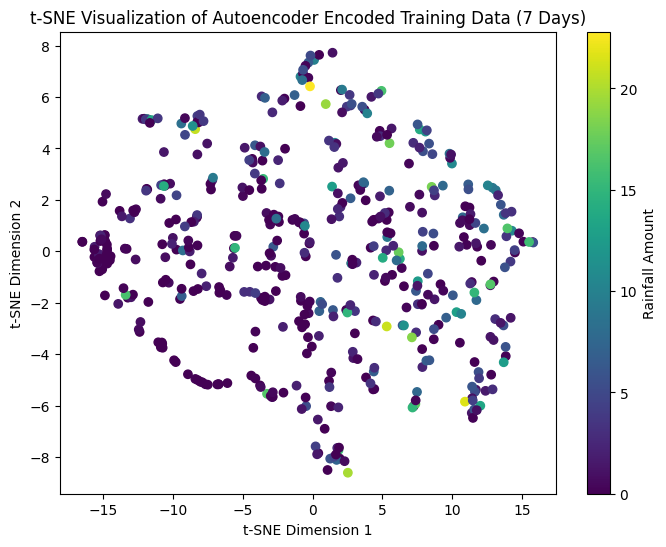

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 23.4738 - mae: 2.6959
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6755 - mae: 2.8825
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0219 - mae: 3.1529
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.9897 - mae: 3.1899
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2407 - mae: 3.0447 
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8185 - mae: 3.1036
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8113 - mae: 3.2303
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.4512 - mae: 3.2658
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5710 - mae: 3.0552
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4565 - mae: 3.0744
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8755 - mae: 3.1163
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2062 - mae: 2.9669
Epoch 13/1200
88/88 ━━━━━

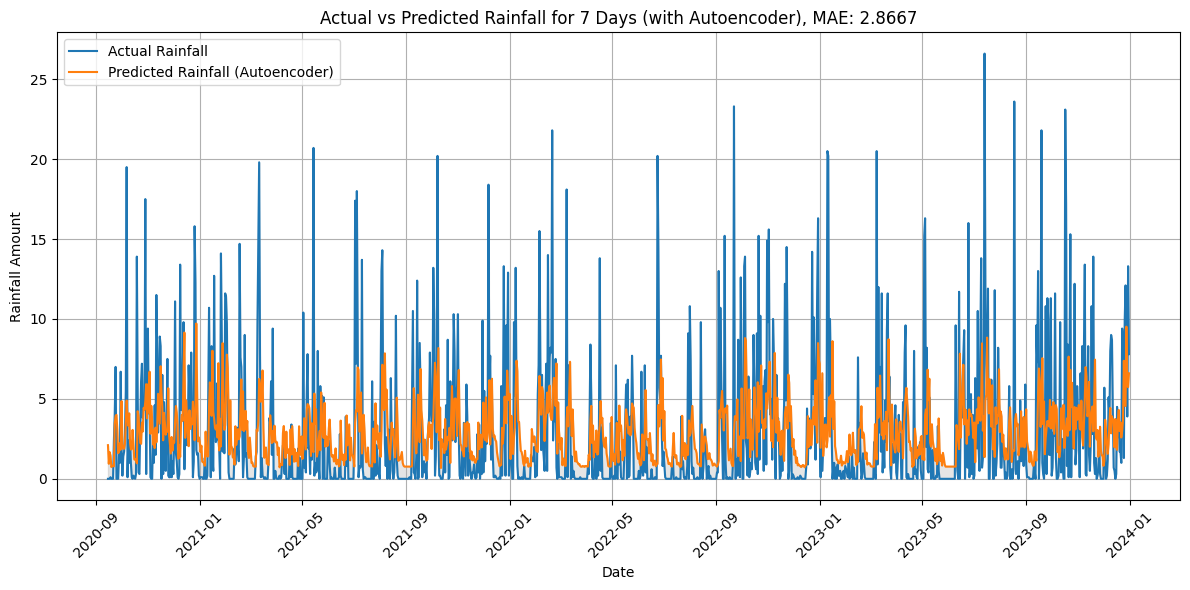


Training and evaluating model with 14 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


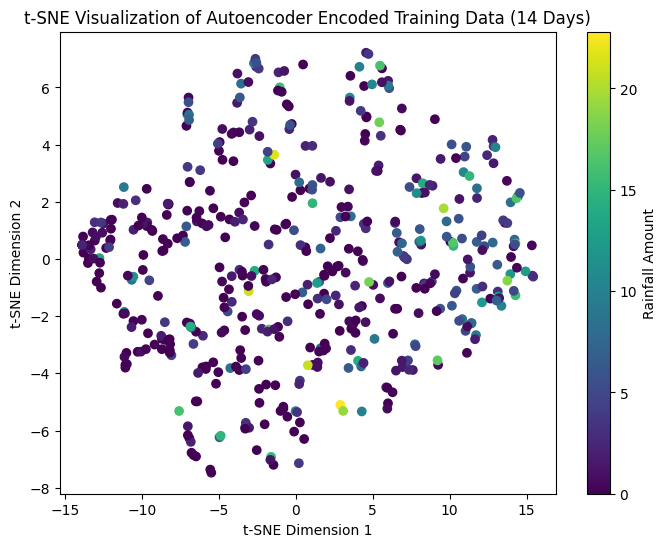

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.5638 - mae: 2.8929
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.3851 - mae: 3.1693
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.7169 - mae: 3.1750
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8604 - mae: 3.0218
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7389 - mae: 3.2596
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5050 - mae: 3.0277
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.0400 - mae: 3.1439
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9247 - mae: 3.2986
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4363 - mae: 2.9292
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0987 - mae: 3.0147
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6856 - mae: 3.0868
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.6762 - mae: 3.0728
Epoch 13/1200
88/88 ━━━━━━

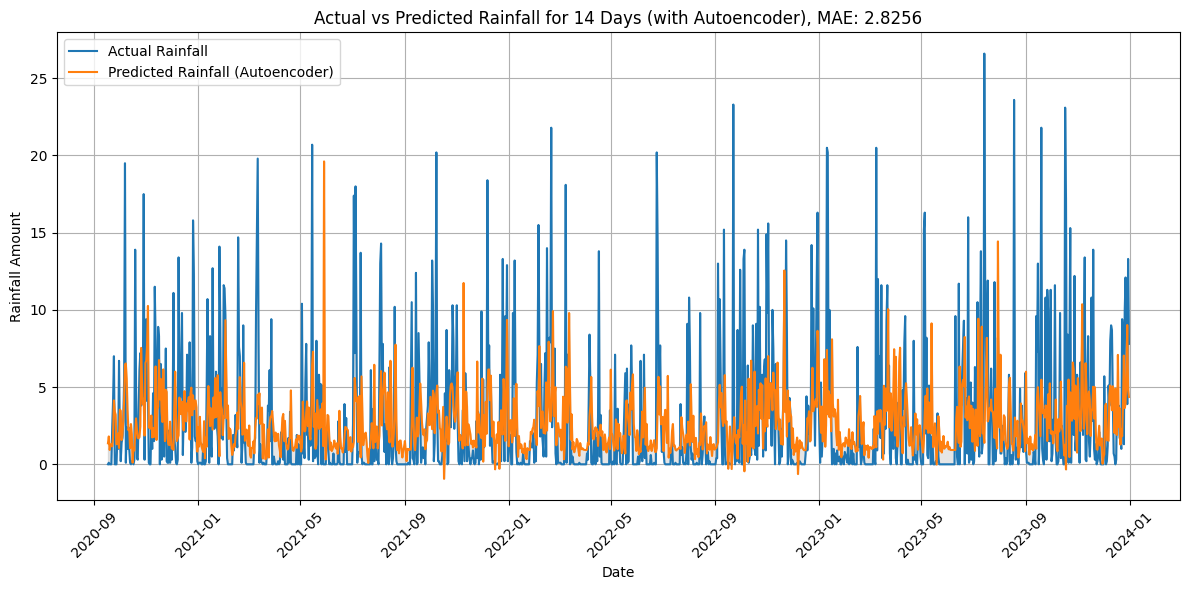


Training and evaluating model with 21 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


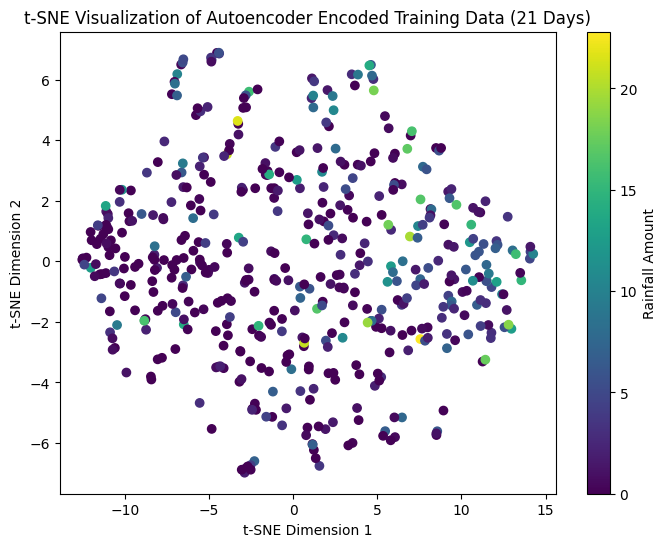

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.2071 - mae: 3.0533
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.2898 - mae: 3.2457
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.2361 - mae: 3.1418
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7663 - mae: 3.1817
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4258 - mae: 3.2287
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5742 - mae: 3.0951
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7904 - mae: 3.0541
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4571 - mae: 3.1085
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8741 - mae: 3.1284
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6648 - mae: 3.0648
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8825 - mae: 3.0652
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3872 - mae: 2.9015
Epoch 13/1200
88/88 ━━━━━━

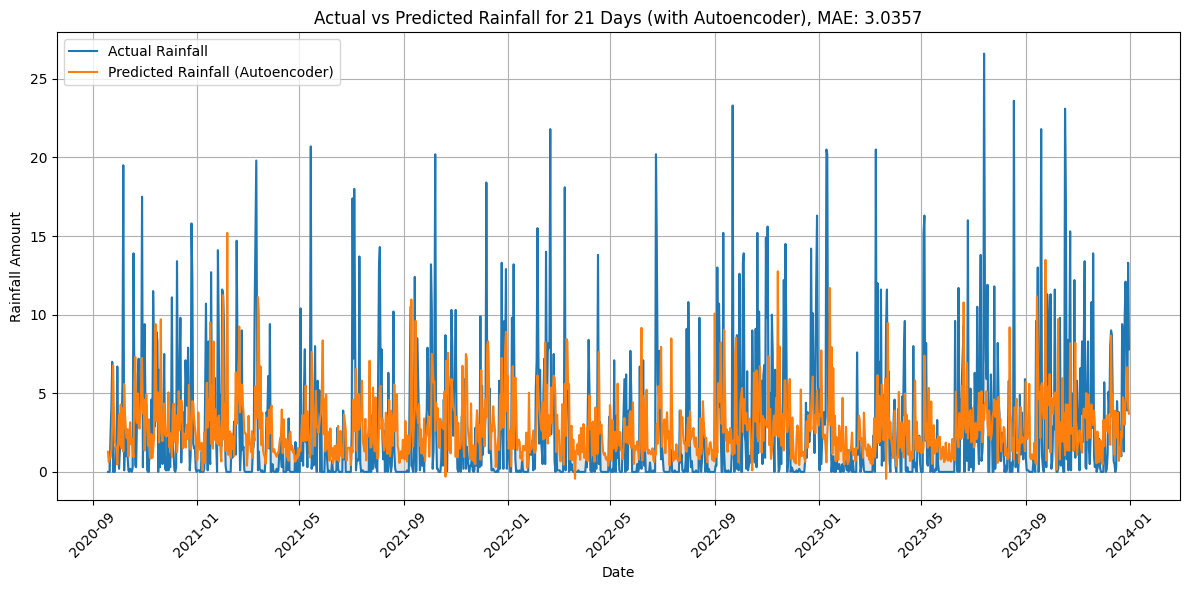


Training and evaluating model with 28 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


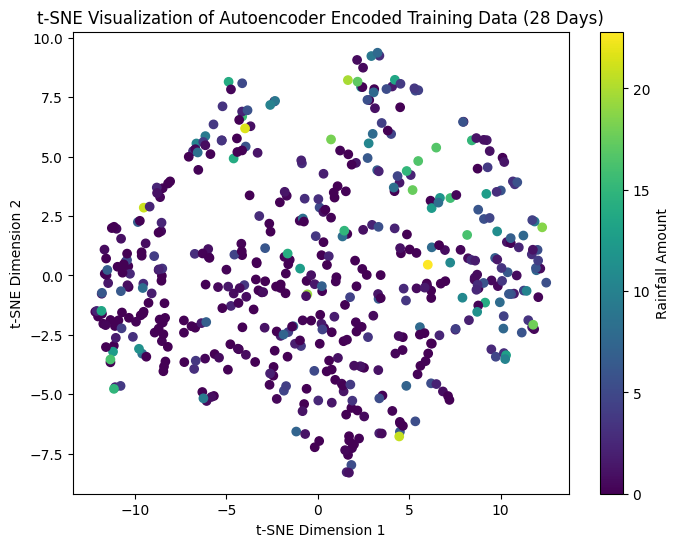

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23.7194 - mae: 2.8319
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.4359 - mae: 3.2413
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8761 - mae: 3.0144  
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.3783 - mae: 2.9712
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8771 - mae: 3.4095
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.9604 - mae: 3.2134
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.0709 - mae: 3.1958
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.1682 - mae: 3.0147
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7428 - mae: 3.1981  
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.7415 - mae: 3.0706
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.6297 - mae: 3.1366  
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.6244 - mae: 2.9677
Epoch 13/1200
88/88 

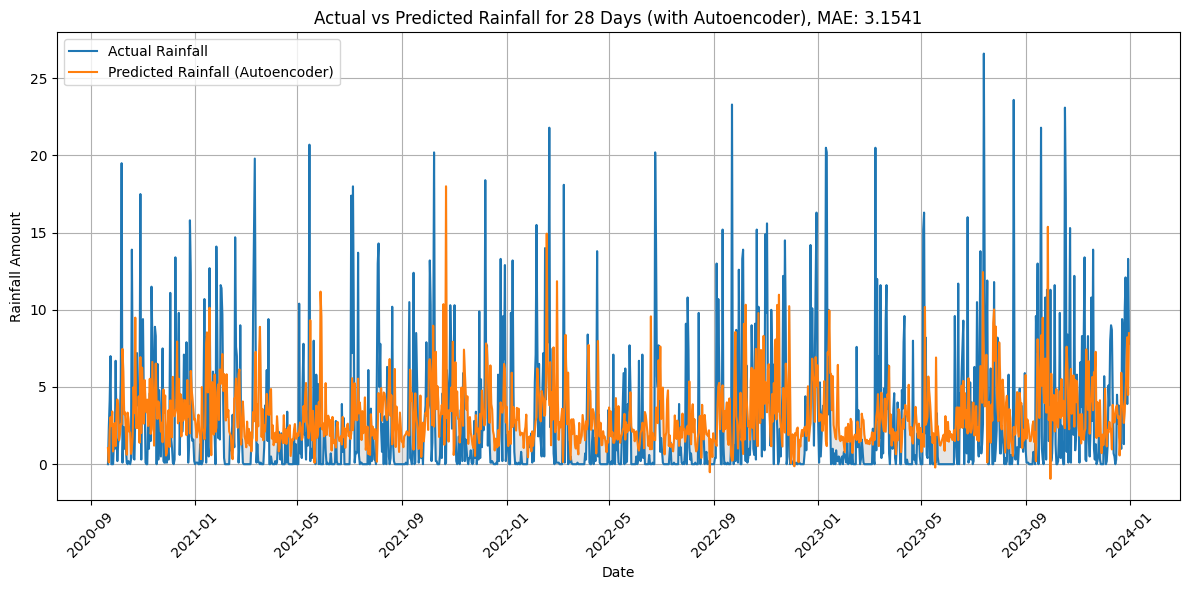

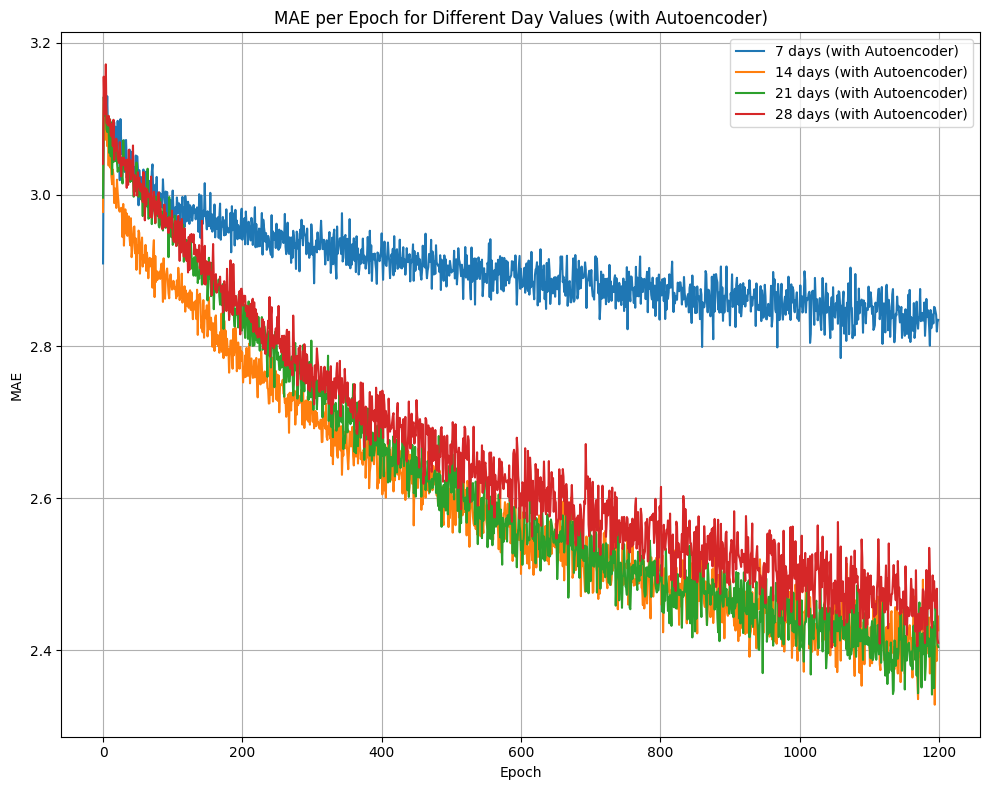

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
import matplotlib.pyplot as plt

# Initialize a dictionary to store MAE values for each 'days' value
mae_per_epoch_per_days_autoencoder = {}

def create_autoencoder(input_dim, encoding_dim=15):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(64, activation='relu')(input_layer)
    encoder = Dense(32, activation='relu')(encoder)
    encoder = Dense(encoding_dim, activation='relu')(encoder)  # Bottleneck layer

    decoder = Dense(32, activation='relu')(encoder)
    decoder = Dense(64, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='linear')(decoder)  # Output layer

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    encoder_model = Model(inputs=input_layer, outputs=encoder)
    return autoencoder, encoder_model

def train_and_evaluate_model_autoencoder(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 3: Apply Autoencoder for Dimensionality Reduction
    input_dim = X_train_scaled.shape[1]
    encoding_dim = min(input_dim, 15)  # Choose a reasonable number of components
    autoencoder, encoder_model = create_autoencoder(input_dim, encoding_dim)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X_train_scaled, X_train_scaled, epochs=200, batch_size=32, verbose=0) # Train the autoencoder
    X_train_encoded = encoder_model.predict(X_train_scaled)
    X_test_encoded = encoder_model.predict(X_test_scaled)

    # Step 4: Apply t-SNE for Visualization of Encoded Data (on a subset for speed if needed)
    tsne = TSNE(n_components=2, random_state=42, n_iter=300)
    X_train_tsne = tsne.fit_transform(X_train_encoded[:min(len(X_train_encoded), 500)]) # Visualize a subset for large datasets
    y_train_subset = y_train[:min(len(y_train), 500)]

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_subset, cmap='viridis')
    plt.colorbar(scatter, label='Rainfall Amount')
    plt.title(f't-SNE Visualization of Autoencoder Encoded Training Data ({days} Days)')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

    # Step 5: Build the Neural Network Model using Encoded Data
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) # Keep MSE for training, add MAE for evaluation

    # Step 6: Train the Model
    history = model.fit(X_train_encoded, y_train, epochs=1200, batch_size=32, verbose=1)

    # Step 7: Evaluate the Model
    y_pred = model.predict(X_test_encoded)
    mae_loss = MeanAbsoluteError()
    mae = mae_loss(y_test, y_pred)

    # Store MAE values for each epoch in the dictionary
    mae_per_epoch_per_days_autoencoder[days] = history.history['mae'] # Store MAE from history

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall (Autoencoder)', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days (with Autoencoder), MAE: {mae:.4f}') # Include MAE in title
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all MAE values for Autoencoder
def plot_mae_autoencoder(mae_per_epoch_per_days_autoencoder):
    plt.figure(figsize=(10, 8))
    for days, mae_values in mae_per_epoch_per_days_autoencoder.items():
        plt.plot(mae_values, label=f'{days} days (with Autoencoder)')

    plt.title('MAE per Epoch for Different Day Values (with Autoencoder)')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
for days in [7, 14, 21, 28]:
    print(f"\nTraining and evaluating model with {days} days of previous rain data (with Autoencoder):")
    train_and_evaluate_model_autoencoder(days, county_clare.copy()) # Pass a copy

# After all models are trained, plot the MAE values for Autoencoder
plot_mae_autoencoder(mae_per_epoch_per_days_autoencoder)

In [17]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Testing with Prophet Model 

c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.



Training and evaluating model with 7 days of previous rain data:


01:43:08 - cmdstanpy - INFO - Chain [1] start processing
01:43:08 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 7 days: 4.568368953279007


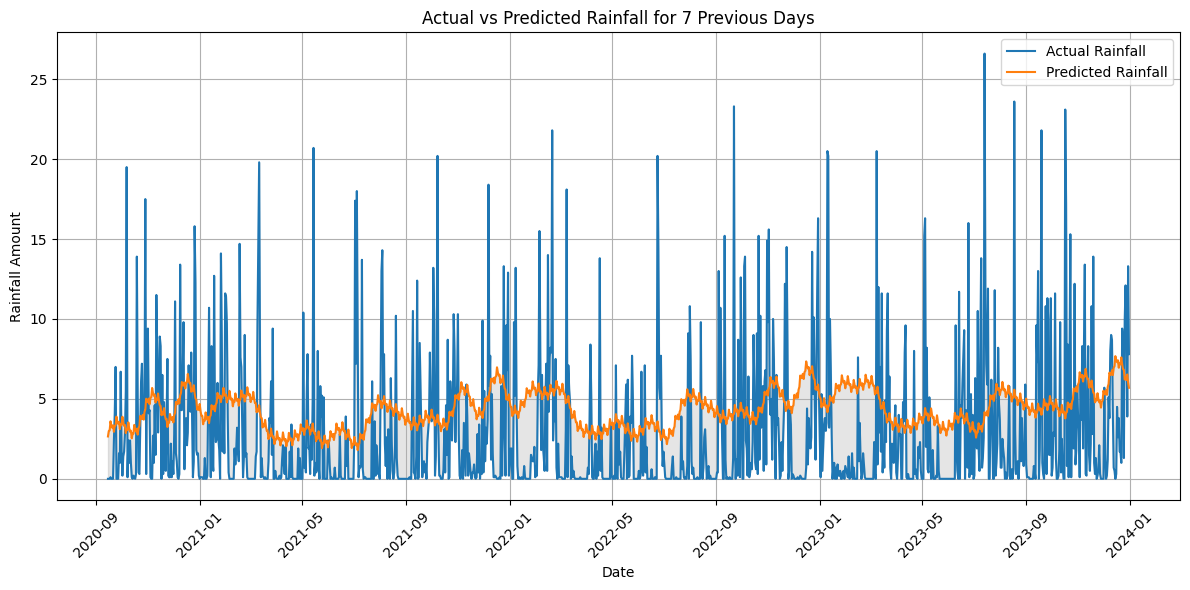


Training and evaluating model with 14 days of previous rain data:


01:43:10 - cmdstanpy - INFO - Chain [1] start processing
01:43:10 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 14 days: 4.531523346046143


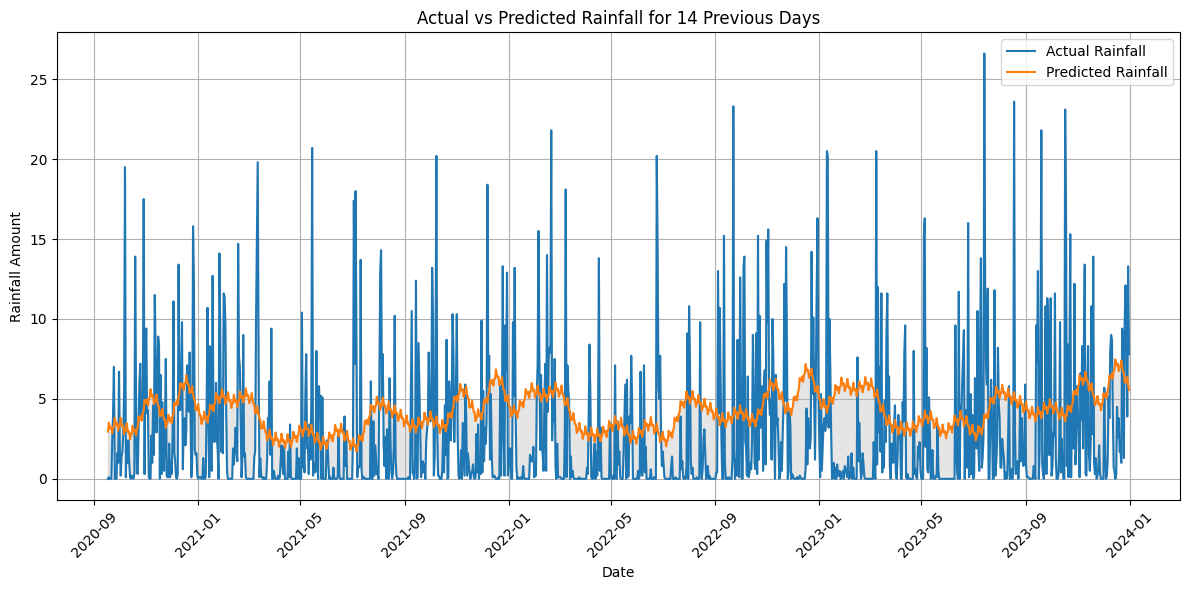


Training and evaluating model with 21 days of previous rain data:


01:43:12 - cmdstanpy - INFO - Chain [1] start processing
01:43:12 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 21 days: 4.511355623771203


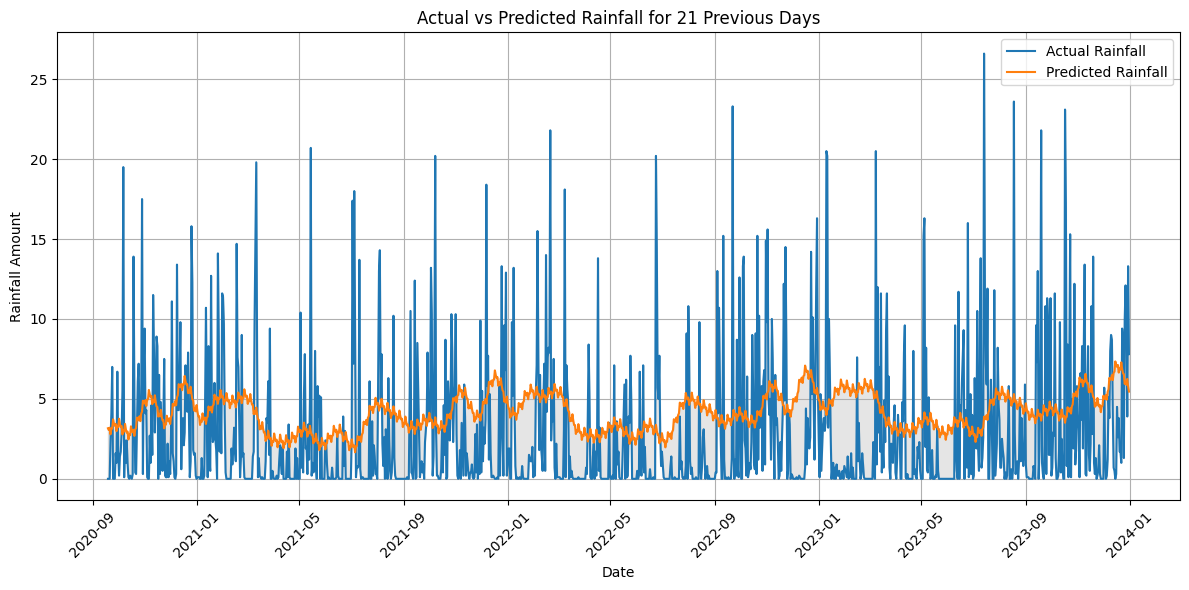


Training and evaluating model with 28 days of previous rain data:


01:43:13 - cmdstanpy - INFO - Chain [1] start processing
01:43:13 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 28 days: 4.553090285009069


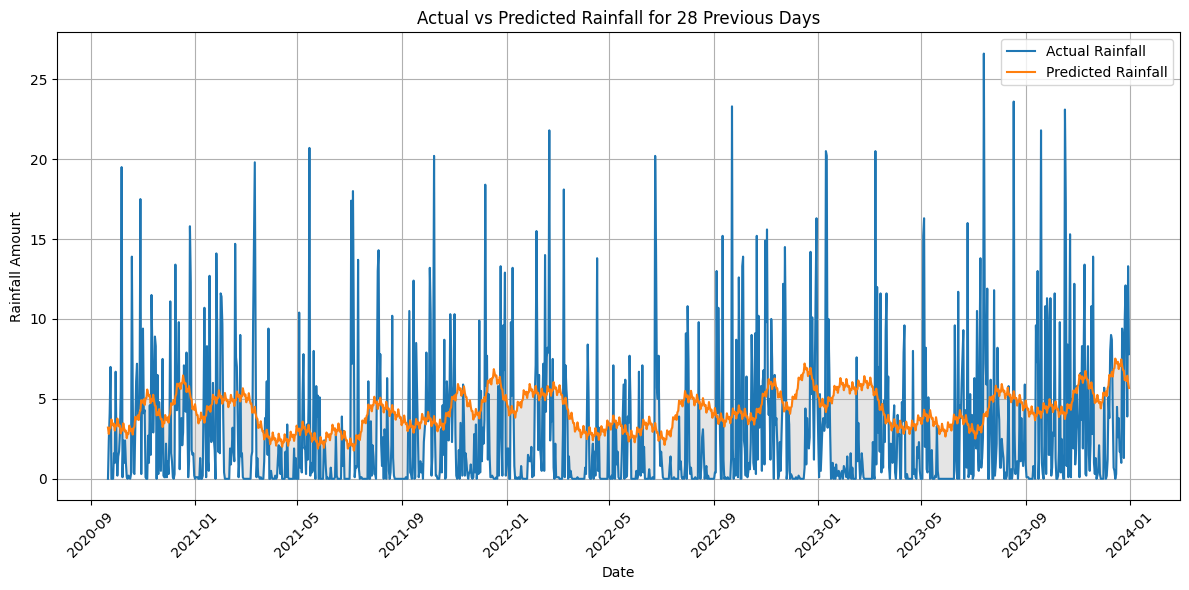

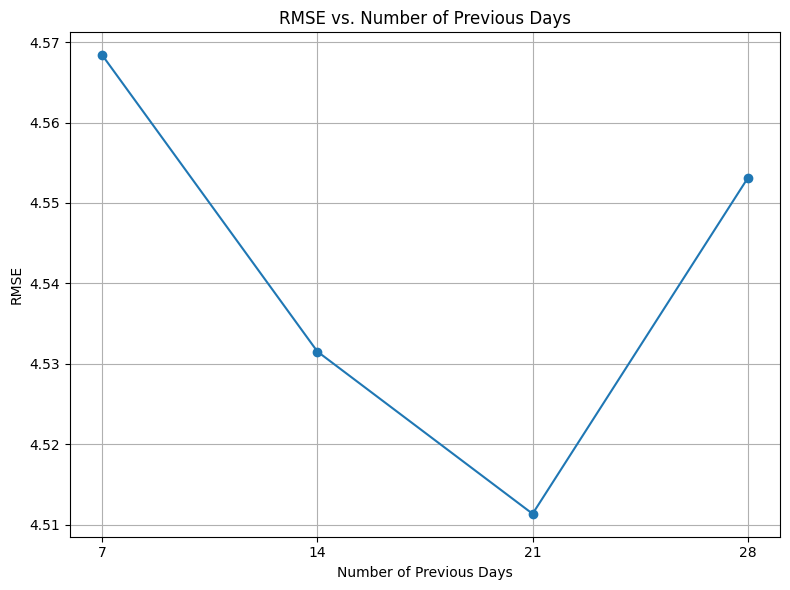

In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

rmse_per_num_previous_days = {}  # Dictionary to store RMSE values

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days + 1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days + 1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    # Prepare data for Prophet model
    train_data_prophet = train_data.reset_index()[['date', target]].rename(columns={'date': 'ds', target: 'y'})
    test_data_prophet = test_data.reset_index()[['date', target]].rename(columns={'date': 'ds', target: 'y'})

    # Step 3: Build the Prophet Model
    model = Prophet()

    # Step 4: Train the Model
    model.fit(train_data_prophet)

    # Step 5: Make Predictions
    future = model.make_future_dataframe(periods=len(test_data_prophet))
    forecast = model.predict(future)

    # Extract the predicted values for the test set
    y_pred = forecast.loc[forecast['ds'].isin(test_data_prophet['ds']), 'yhat'].values

    # Calculate RMSE
    rmse = np.sqrt(np.mean((test_data_prophet['y'].values - y_pred) ** 2))

    # Store RMSE values for each number of previous days
    rmse_per_num_previous_days[days] = rmse
    print(f"RMSE for {days} days: {rmse}")  # Added this line
    # Create a DataFrame for easy plotting of individual predictions
    predictions_df = pd.DataFrame({'Actual': test_data_prophet['y'].values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Previous Days')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse_values(rmse_dict):
    """
    Plots the RMSE values for different numbers of previous days used in the model.

    Args:
        rmse_dict (dict): A dictionary where keys are the number of previous days
                          and values are the corresponding RMSE.
    """
    days = list(rmse_dict.keys())
    rmse_values = list(rmse_dict.values())

    plt.figure(figsize=(8, 6))
    plt.plot(days, rmse_values, marker='o', linestyle='-')
    plt.title('RMSE vs. Number of Previous Days')
    plt.xlabel('Number of Previous Days')
    plt.ylabel('RMSE')
    plt.xticks(days)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
num_previous_days_to_test = [7,14,21,28]
for days in num_previous_days_to_test:
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days, county_clare.copy()) # Pass a copy

# Plot RMSE values
plot_rmse_values(rmse_per_num_previous_days)

Applying Kernel PCA with Prophet


Training and evaluating model with 7 days of previous rain data:


01:43:16 - cmdstanpy - INFO - Chain [1] start processing
01:43:16 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 7 days: 4.568368953279007


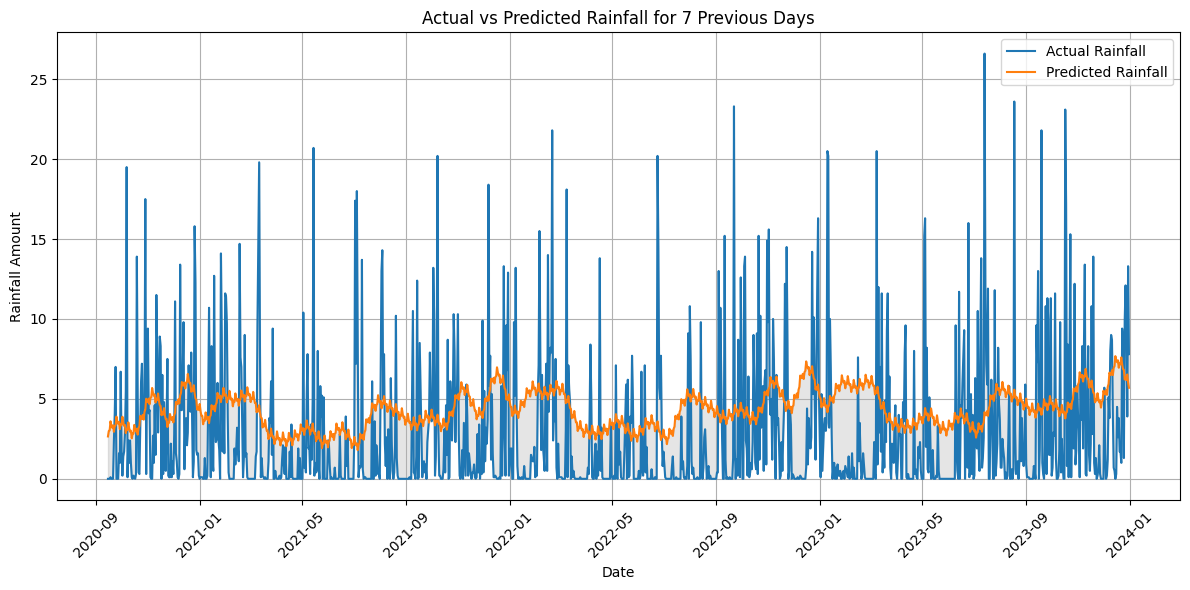


Training and evaluating model with 14 days of previous rain data:


01:43:19 - cmdstanpy - INFO - Chain [1] start processing
01:43:19 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 14 days: 4.531523346046143


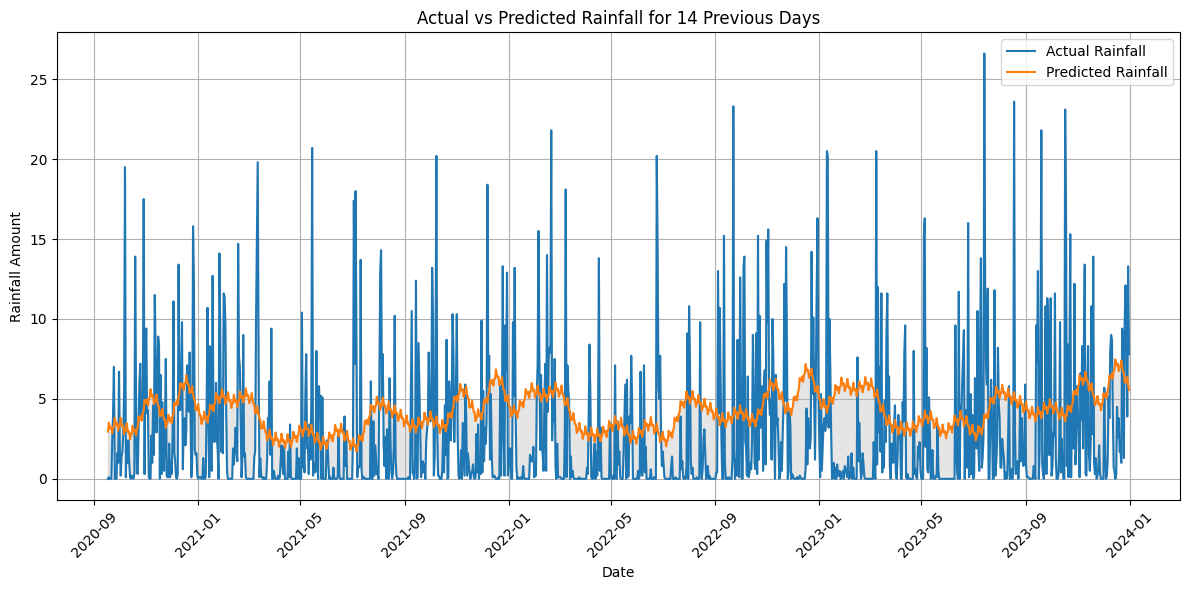


Training and evaluating model with 21 days of previous rain data:


01:43:23 - cmdstanpy - INFO - Chain [1] start processing
01:43:23 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 21 days: 4.511355623771203


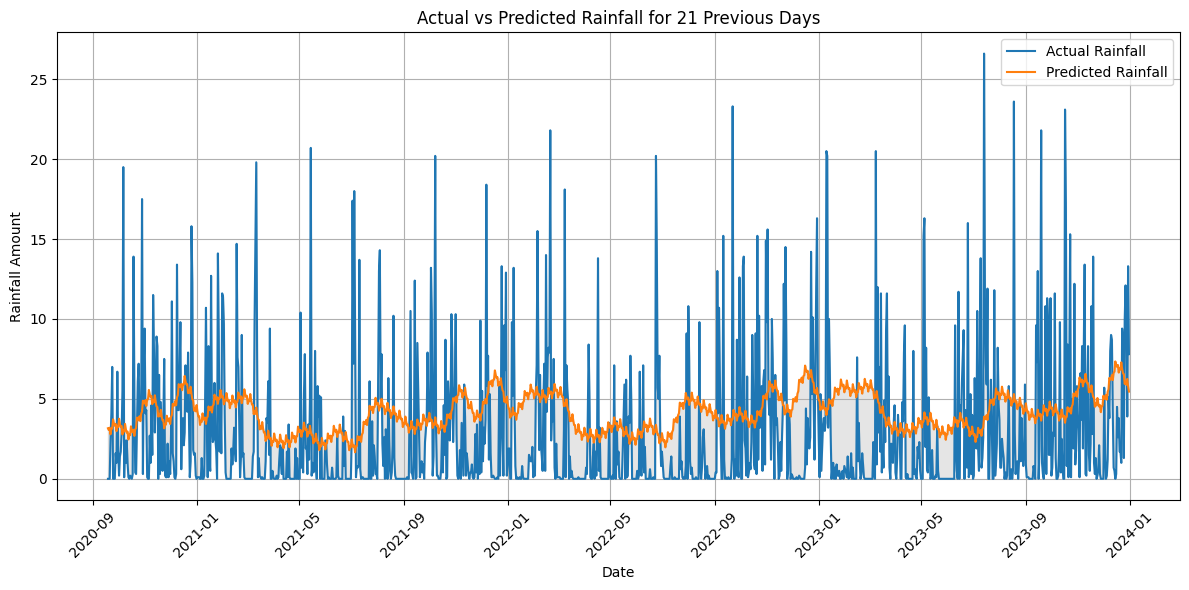


Training and evaluating model with 28 days of previous rain data:


01:43:27 - cmdstanpy - INFO - Chain [1] start processing
01:43:27 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 28 days: 4.553090285009069


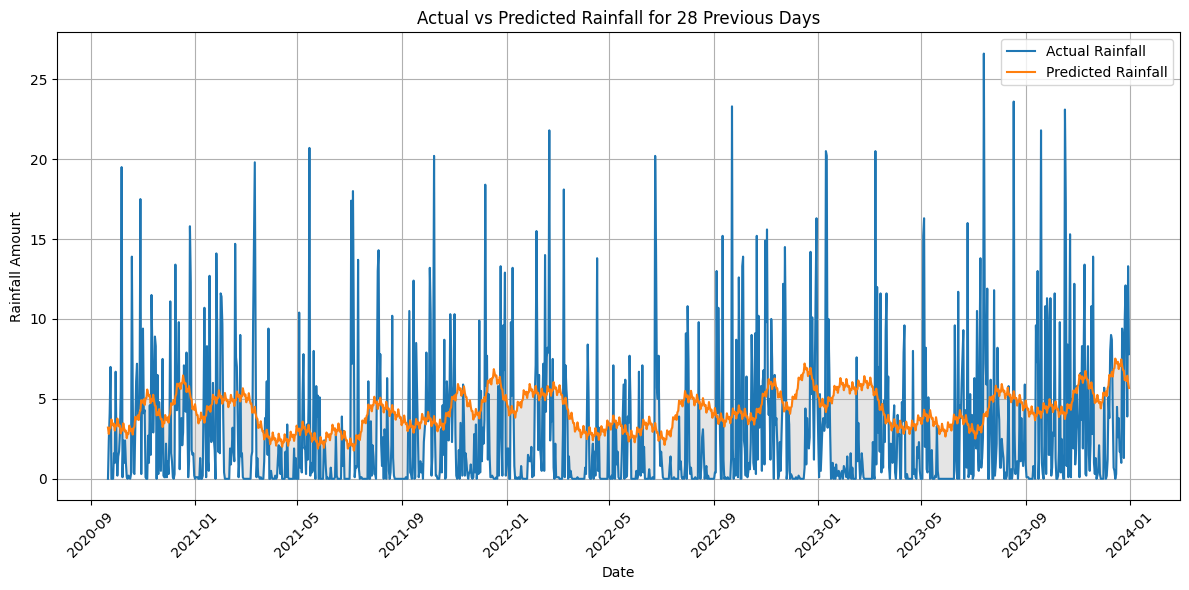

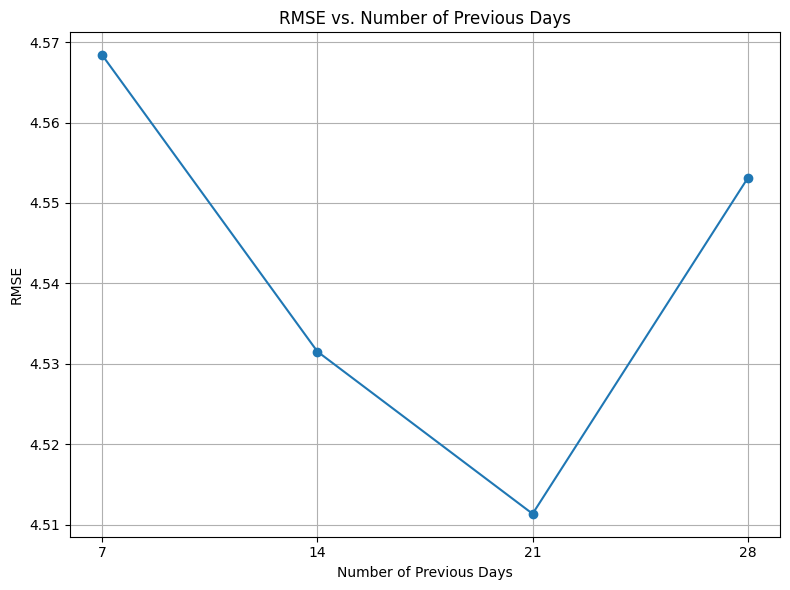

In [19]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import KernelPCA

rmse_per_num_previous_days = {}  # Dictionary to store RMSE values

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days + 1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days + 1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    # Apply Kernel PCA
    kpca = KernelPCA(kernel='rbf', n_components=days)
    train_data_kpca = kpca.fit_transform(train_data.drop(columns=[target]))
    test_data_kpca = kpca.transform(test_data.drop(columns=[target]))

    # Prepare data for Prophet model
    train_data_prophet = pd.DataFrame(train_data_kpca, index=train_data.index, columns=[f'kpca_{i}' for i in range(days)])
    train_data_prophet[target] = train_data[target].values
    train_data_prophet.reset_index(inplace=True)
    train_data_prophet.rename(columns={'date': 'ds', target: 'y'}, inplace=True)

    test_data_prophet = pd.DataFrame(test_data_kpca, index=test_data.index, columns=[f'kpca_{i}' for i in range(days)])
    test_data_prophet[target] = test_data[target].values
    test_data_prophet.reset_index(inplace=True)
    test_data_prophet.rename(columns={'date': 'ds', target: 'y'}, inplace=True)

    # Step 3: Build the Prophet Model
    model = Prophet()

    # Step 4: Train the Model
    model.fit(train_data_prophet)

    # Step 5: Make Predictions
    future = model.make_future_dataframe(periods=len(test_data_prophet))
    forecast = model.predict(future)

    # Extract the predicted values for the test set
    y_pred = forecast.loc[forecast['ds'].isin(test_data_prophet['ds']), 'yhat'].values

    # Calculate RMSE
    rmse = np.sqrt(np.mean((test_data_prophet['y'].values - y_pred) ** 2))

    # Store RMSE values for each number of previous days
    rmse_per_num_previous_days[days] = rmse
    print(f"RMSE for {days} days: {rmse}")  # Added this line
    # Create a DataFrame for easy plotting of individual predictions
    predictions_df = pd.DataFrame({'Actual': test_data_prophet['y'].values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Previous Days')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse_values(rmse_dict):
    """
    Plots the RMSE values for different numbers of previous days used in the model.

    Args:
        rmse_dict (dict): A dictionary where keys are the number of previous days
                          and values are the corresponding RMSE.
    """
    days = list(rmse_dict.keys())
    rmse_values = list(rmse_dict.values())

    plt.figure(figsize=(8, 6))
    plt.plot(days, rmse_values, marker='o', linestyle='-')
    plt.title('RMSE vs. Number of Previous Days')
    plt.xlabel('Number of Previous Days')
    plt.ylabel('RMSE')
    plt.xticks(days)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
num_previous_days_to_test = [7,14,21,28]
for days in num_previous_days_to_test:
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days, county_clare.copy()) # Pass a copy

# Plot RMSE values
plot_rmse_values(rmse_per_num_previous_days)
